## House Price Prediction

[ ] Add some notes on project here.  
[ ] Add some notes about values of estimated coefficients.


### Importing and Visualizing the dataset

In [2]:
import numpy as np
import pandas as pd

from pandas import DataFrame, Series

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## white grid background for seaborn plots
sns.set_style('whitegrid')
%matplotlib inline

Import and check what we have in dataset:

In [3]:
# Load dataset correspond to housing
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
# Check the content of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

We have 13 different attributes and the 14th one (Median Value) is usually the target, as mentioned also in the description.

#### Visualizing the dataset

Plot histogram of the prices

Text(0, 0.5, 'Number of Houses')

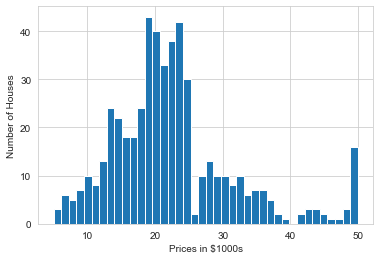

In [5]:
plt.hist(boston.target, bins=40)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of Houses')

So, roughly speaking, there is an average price in the range of $20Ks.

Now we can plot scatterplot of the target versus one of the features, for example, price versus number of rooms in the house. _Based on dataset description "RM" is the label for the house's number of rooms. It is the sixth label in the dataset so the sixth column in dataframe._

Text(0, 0.5, 'Prices in $1000s')

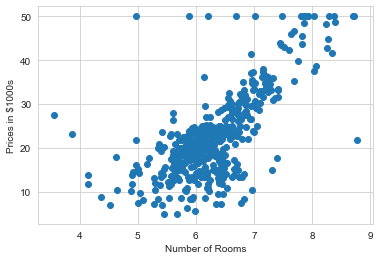

In [56]:
# Scatter plot Price versus number of Rooms (6th column --> index:5)
# Type boston.daya is numpy.ndarray
plt.scatter(boston.data[:,5],boston.target)
plt.xlabel('Number of Rooms')
plt.ylabel('Prices in $1000s')

So we have a trend that shows the prices increase with the number of rooms in the house, which reasonable. In other words, there is a positive correlation between the number of rooms and the price of a house.

Now make dataframe from dataset to use seaborn plotting features.

In [11]:
# Make dataframe from dataset
boston_df = DataFrame(boston.data)

# label columns
boston_df.columns = boston.feature_names

# Add new 'Price' column from the target
boston_df['Price'] = boston.target

#show the content of the dataframe
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now create a linear fit by seaborn

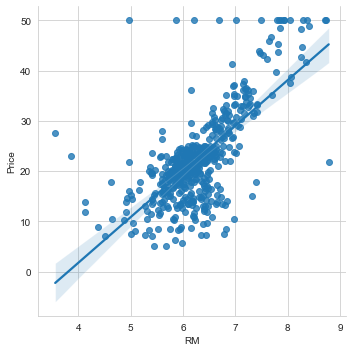

In [12]:
# create a linear fit by seaborn lmplot
sns.lmplot('RM','Price',data = boston_df)

### The best fit using linear algebra library in numpy
For this purpose, at first, I'll use linear algebra library in numpy and the least square method. However, later in this micro project, I'll also return back to it from machine learning point of view. 

To use linear regression, first we should set up $x$ and $y$ arrays and then use the equation for the line

$$y=mx + b$$

and then find $m$ and $b$. However, to transfer it to something which numpy underestand, one should consider the above equation as

$$y=Ap$$
where
$$A = [x\quad1]$$
and
$$
p=\left[
\begin{array}{c} m \\ b \end{array}
\right].
$$



In [80]:
# Consider number of rooms as x and price as y
# np.vstack will make the dimension correct
x = boston_df.RM
y = boston_df.Price

# convert x to the form of [x 1]
A = np.vstack(np.array([[value,1] for value in x ], dtype=np.float))

Use linear algebra library and leaste square method to find $m$ and $b$.

In [85]:
# Applying least square method to find m and b and also the errors
Result = np.linalg.lstsq(A, y)
# m & b
m, b = Result[0]
# error
err = Result[1][0]
# The root mean square error
rmse = np.sqrt(err/len(x))

# Print the results
print('The best fitted line defines by m={:.2f}, and b={:.2f}'.format(m,b))
print('The root mean squared error is {:.2f}'.format(rmse))

The best fitted line defines by m=9.10, and b=-34.67
The root mean squared error is 6.60


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Plot the bist linear fit over the data points and based on the __rmse__ we found, we expect that a house price to be within 6.6x2=13.2 K$ of our fit.

Text(0, 0.5, 'Prices in $1000s')

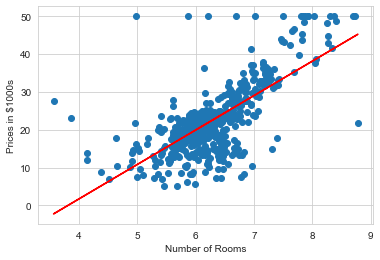

In [84]:
# The original datapoints; Price vs Num of Rooms
plt.plot(boston_df.RM,boston_df.Price,'o')

# The best linear fit
plt.plot(x, m*x + b,'r',label='Best Fit Line')
plt.xlabel('Number of Rooms')
plt.ylabel('Prices in $1000s')

### Multivariate Regression using Scikit Learn Library

In [90]:
# Import scikit learn library and also linear regression
import sklearn
from sklearn.linear_model import LinearRegression

# Create a LinearRegression Object
reg = LinearRegression()

Now define the multivariant data and also the target and then applying the linear regression based on defined LinearRegression object:

In [94]:
# Multivariant data, remove 'Price' column as it is the target
X = boston_df.drop('Price',1)

# Define Target
Y = boston_df.Price

# Applying Linear Regression
reg.fit(X,Y)

print('The estimated intercept coefficient is {:.2f}.'.format(reg.intercept_))
print('The number of coefficients which was used are {}.'.format(len(reg.coef_)))


The estimated intercept coefficient is 36.46.
The number of coefficients which was used are 13.


Making a dataframe of all features and their correspoinding __estimated coefficients__ obtained from the linear regression using the .fit() method.

In [96]:
# Make a dataframe from the name of the features
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

# Add estimated coefficients from the linear regression as new column
coeff_df['Coefficient Estimate'] = pd.Series(reg.coef_)

# Show the dataframe including features and corresponding estimated coeff
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


The most positive value of the estimated coefficients corresponds to number of rooms (RM) which is definitely reasonable. So it means that the correlation between the house price and the number of rooms is defenitely positive.

### Training and Validating Data using Scikit Learn Library

The correct way to pick up data from the entire sample for training either validation is __random selection__. For this purpose one can use built in function in scikit learn called _train_test_split_, which is accessible via _model_selection_ method.

An important point here is the shape of the x input, which as mentioned before should be as [x 1].

In [111]:
# Setup train and validation (test) datasets
# Reminder: A = [x 1] with corrected shape (dimensions)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(A,boston_df.Price)

# Check the number of train and test samples chosen by default
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(379, 2) (127, 2) (379,) (127,)


Now we will to linear regression and fit a line to a training dataset and at the end predict the price.

In [112]:
# Do a linear regression on the training datasets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

It is valuable to run the prediction to both on training and validation (test) datasets, so we can compare the results and have a sense of performance of the model.

In [113]:
# Prediction of both training and validation datasets
pred_train = reg.predict(x_train)
pred_test = reg.predict(x_test)

#### Mean Squared Error (MSE)

In regression analysis, __mean squared (prediction) error__ can also refer to the mean value of the squared deviations of the predictions from the true values, over an out-of-sample test space, generated by a model estimated over a particular sample space. This also is a known, __computed quantity__, and it varies by sample and by out-of-sample test space.

In [114]:
print('A model by fitting to x_trains result a prediction in y_train with MSE of {:.2f}'.format(np.mean((y_train - pred_train) ** 2)))
    
print('A model by fitting to x_trains result a prediction in y_test with MSE of {:.2f}'.format(np.mean((y_test - pred_test) ** 2)))

A model by fitting to x_trains result a prediction in y_train with MSE of 45.05
A model by fitting to x_trains result a prediction in y_test with MSE of 39.82
